## Food Saftey Analysis

Written by Joseph E. Goznalez

jegonzal@cs.berkeley.edu

This analysis is inspired by Jonathan Dinu's excellent post:
https://github.com/hopelessoptimism/happy-healthy-hungry/blob/master/h3.ipynb

# Motivation

Have you ever seen one of these signs?

<img src="https://s3-media4.fl.yelpcdn.com/bphoto/CZU3XdsOsDXf42H0tIpzBQ/o.jpg" width="300px" style="float:right">

* Have you ever wondered what it means?  

* Is this a safe place to eat?

* What does a score of 90 mean?

In this lecture we will explore food safety ratings for San Francisco to get a better picture of what these ratings mean.  



## Thinking about Questions

Before we start, let's spend a few minutes thinking about the questions that we want to answer.

1. What is a good restaurant score for food safety inspections?

1. What are common issues with restaurants that could be better addressed? 

1.  Are there regions of the city sub-par?

1.  Is the situation getting worse or better?

What are some other questions that we might want to answer?

## Where can we get data?

Description of inspection data for SF:

https://www.sfdph.org/dph/EH/Food/Score/

#### Data Links from Yelp LIVES program:
1. Yelp LIVES site: https://www.yelp.com/healthscores
1. Data description: https://www.yelp.com/healthscores#businesses
1. Downloading data from various locations: https://www.yelp.com/healthscores/feeds


## Getting the data

I downloaded several feeds and stored them in the local data folder.
Lets first see what files we downloaded `data/san_francisco`

In [1]:
# Todo

There is data for other cities as well but we will focus on San Francisco for today.

### Questions

1. How big is the data?
2. File types?  

# Looking at the data

Data scientists will often use many tools to better understand the data.  

The first set of tools we might use are command line utilities:
* **`head -n 5`**: read the first 5 lines of a file
* **`wc`**: Compute the number of lines (records) in a file.  

We can use these command line utilities from within the python notebook.  This is done by prefixing each command with the "bang" operator `!`

## Using `Head`

Using head gives us a better picture of the contents of the `businesses.csv` file:

In [2]:
# TODO

---

In [3]:
!head -n 3 ./data/san_francisco/inspections.csv

In [4]:
!head -n 3 ./data/san_francisco/violations.csv

Use `cat` to read the entire file

In [5]:
!cat ./data/san_francisco/legend.csv

The legend indicates what ranges of scores mean.  For example, this suggests that **poor** quality restaurants will have scores at or below 70.  

# Use `man` to learn

To learn more about these commands try:

In [6]:
# TODO

---

In [7]:
# man cat

press `esc` to clear the pane.

## What have we learned so far?

---

1. The first line of the file defines the header of the table.
1. These files consist of comma separated values (CSV).
1. All the fields appear to be quoted (this will be helpful in parsing the file).
1. The `business_id` field seems to appear in multiple files and is probably unique in businesses?
1. We can get a sense for the kind of information in each file (though we should definitely read the [documentation](https://www.yelp.com/healthscores#businesses)) 

# How big is the data?

We already looked at the raw file size:

In [8]:
!ls -Rlh data/san_francisco/

total 9904
-rwxr-xr-x  1 jegonzal  staff   645K Jan  1 20:50 businesses.csv
-rwxr-xr-x  1 jegonzal  staff   493K Jan  1 20:50 inspections.csv
-rwxr-xr-x  1 jegonzal  staff   120B Jan  1 20:50 legend.csv
-rwxr-xr-x  1 jegonzal  staff   3.7M Jan  1 20:50 violations.csv


1. Why might we want to know the size of the data? 
1. Why don't we just load it into python?

---


This dataset is fairly small but in general the data we study may be large (e.g., too big to easily manipulate in memory).  

# How Many Record?

1. How many records or observations do we have?  
1. Can we answer this question just from the size of the file?

---

In the following we write a small **bash** script to calculate the number of lines each file. 

In [9]:
%%bash
# We can use ipython Magic commands to 
# evaluate the entire cell in bash
for f in $(ls -R data/san_francisco/*); do
    wc $f
done;

    6316   44398  660035 data/san_francisco/businesses.csv
   15431   15431  505325 data/san_francisco/inspections.csv
       5       6     120 data/san_francisco/legend.csv
   40937  432008 3891639 data/san_francisco/violations.csv


The `wc` command prints the number of _lines_, _words_, and _characters_ respectively in the file. 

To learn more about this command run:  

In [10]:
man wc

Press `esc` to close the popup pane.

# Counting Lines in Python (Skip in Class)

In DS100 we will be using Python to do a lot of our analysis.  

How could we write a similar program in Python?

```bash
for f in $(ls -R data/san_francisco/*); do
    wc $f
done;
```

In [11]:
import os
for fname in os.listdir("data/san_francisco"):
    with open(os.path.join("data/san_francisco", fname), "rb") as f:
        lines = sum(1 for line in f)
        print("Lines in", fname, ":", lines)

Lines in businesses.csv : 6316
Lines in inspections.csv : 15431
Lines in legend.csv : 5
Lines in violations.csv : 40937


The above Python program demonstrates a few big ideas:

1. programmatically traversing the file systems with `os.listdir`
1. using a `with` expression to open (and then automatically close) a file.
1. using a generator (the expression `sum(1 for line in f)`) to count the number of lines without first loading the entire file in memory.  


---

# A quick note on file size

When we load data into a program it will often increase in size.  Therefore we need to be careful when loading entire files:

In [12]:
import sys

with open("data/san_francisco/violations.csv", "r") as f:
    lines = f.readlines()

In [13]:
print("Size of list container:", 
      sys.getsizeof(lines) / (10. ** 6) , 
      "MBytes")

Size of list container: 0.342696 MBytes


In [14]:
print("Sum of lines objects:", 
      sum(sys.getsizeof(l) for l in lines) / (10. ** 6), 
      "MBytes")

Sum of lines objects: 5.856615 MBytes


In [15]:
!ls -Rlh data/san_francisco/violations.csv

-rwxr-xr-x  1 jegonzal  staff   3.7M Jan  1 20:50 data/san_francisco/violations.csv


First note that the file takes a little more space in memory than it did on disk.  Why?

---

This is because the data structures to store the contents of the file may contain extra fields (e.g., length and points) that add additional overhead.

Data scientists need to think about computational issues:

1. Can we fit the data in memory?
1. How long will this analysis take to run?

This is why knowing the size of the file can be important before loading it.

### Iterating (Skip in Class)
What if I wanted to know the number of unique businesses in the `violations.csv` file without loading the entire file into memory at once?

In [16]:
business_ids = set()
with open("data/san_francisco/violations.csv", "r") as f:
    next(f)
    for line in f:
        business_ids.add(int(line.split(",")[0]))

In [17]:
print("There are", len(business_ids), "unique business ids.")

There are 5259 unique business ids.


Interesting there are fewer businesses in the `violations.csv` file than there are lines in the `businesses.csv` file. Perhaps there are no violations for some businesses?  Let's check to see how many unique `business_id`s are in the `businesses.csv` file.  

To do this we will practice using bash commands instead.

# A little more with bash commands

Could we have computed the number of unique businesses using just Bash commands?

1. **`tail`** returns the end of the file.  
```bash
tail -n +2
``` 
skips the first line of the file.
1. **`cat`** reads the entire file
1. **`cut`** extracts a field from row. 
```bash
cut -f 1 -d ","
```
extracts the first field from a line delimited by commas. 
1. **`sort`** sorts the input
1. **`uniq`** returns the unique entries form a _sorted_ input
1. **`wc`** as earlier counts the entries in the output.

We can compose multiple operations using `|` (pipe).

In [18]:
%%bash
tail -n +2 data/san_francisco/businesses.csv | head -n 5

10,"TIRAMISU KITCHEN","033 BELDEN PL","San Francisco","CA","94104","37.791116","-122.403816","+14154217044"
19,"NRGIZE LIFESTYLE CAFE","1200 VAN NESS AVE, 3RD FLOOR","San Francisco","CA","94109","37.786848","-122.421547","+14157763262"
24,"OMNI S.F. HOTEL - 2ND FLOOR PANTRY","500 CALIFORNIA ST, 2ND  FLOOR","San Francisco","CA","94104","37.792888","-122.403135","+14156779494"
31,"NORMAN'S ICE CREAM AND FREEZES","2801 LEAVENWORTH ST ","San Francisco","CA","94133","37.807155","-122.419004",""
45,"CHARLIE'S DELI CAFE","3202 FOLSOM ST ","San Francisco","CA","94110","37.747114","-122.413641","+14156415051"


In [19]:
%%bash
tail -n +2 data/san_francisco/businesses.csv \
    | cut -f 1 -d "," \
    | head -n 10

10
19
24
31
45
48
50
54
56
58


cut: stdin: Illegal byte sequence


The above error occurs because the file is encoded in a non UTF-8 string format.  In general this is often the older ISO format ISO-8859-1.  We can use `iconv` to clean up the file.

In [20]:
man iconv

In [21]:
!tail -n +2 data/san_francisco/businesses.csv \
    | iconv -t UTF-8 -f ISO-8859-1 \
    | cut -f 1 -d "," \
    | head -n 10

10
19
24
31
45
48
50
54
56
58


Adding `sort`:

In [22]:
%%bash
tail -n +2 data/san_francisco/businesses.csv \
    | iconv -t UTF-8 -f ISO-8859-1 \
    | cut -f 1 -d "," \
    | sort \
    | head -n 10

10
1000
10011
1002
1003
10030
1005
1008
10083
10099


Adding `uniq`:

In [23]:
%%bash
tail -n +2 data/san_francisco/businesses.csv \
    | iconv -t UTF-8 -f ISO-8859-1 \
    | cut -f 1 -d "," \
    | sort \
    | uniq \
    | wc

    6315    6315   35738


There is one less unique `business_id` than there are lines in the file.  Why is that?

In DS-100 we will largely focus on analysis within Python.  However, as a data scientist you may want to learn more about using these Bash shell commands (common to all POSIX shells). Others worth learning are:

1. **`cd`**, **`ls`**, **`pwd`**, **`mkdir`**, and **`rm`** are file and folder traversal and manipulation commands.
1. **`grep`** regular expression pattern matching
1. **`tr`** change individual characters
1. **`tee`** used to split an output down two paths
1. **`awk`** a string processing framework with it's own built in language for string transformations.
1. **`zip`**, **`gzip`**, **`bzip2`**, and **`tar`** are compression and archiving commands


#  The _Pandas_ DataFrame Library

In this class we will frequently operate on data stored in table form.  A common data structure for tabular data in analysis tools is a DataFrame.

Conceptually DataFrames behave like tables (in a Spreadsheet) with rows corresponding to data records and columns corresponding to fields.  DataFrames are also like Matrices in that we can index a row or column of data.  However, unlike Matrices DataFrames can store data of different types in each column.

Many of you may already be familiar with DataFrames from Data8.  In Data8 you used a DataFrame library called _DataScience_ created here at Berkeley.  The Berkeley _DataScience_ library contains a simple DataFrame data structure with a few basic operations.  In contrast many of the DataFrame APIs in use today (e.g., Pandas, Spark, and R) have fairly extensive APIs with numerous short-cuts and optimizations.  


One of the most commonly used DataFrame APIs today is the Python Pandas Library.  This library was heavily inspired by the DataFrame concepts in the R programming language.  

In DS100 we will the Pandas DataFrame library for many of the assignments.  We encourage students to read a little about Pandas [here](http://proquest.safaribooksonline.com/9781449323592)

# Loading the DataFrame

One of the useful features of Pandas is its ability to load fairly messy "CSV" files:

In [24]:
import pandas as pd


# note the need to provide encoding information for this text file
bus = pd.read_csv("data/san_francisco/businesses.csv", 
                             encoding='ISO-8859-1')

ins = pd.read_csv("data/san_francisco/inspections.csv")

vio = pd.read_csv("data/san_francisco/violations.csv")

If you look at the `pd.read_csv` command you will see that it has a very large number of arguments:

In [25]:
pd.read_csv?

To get a sense as to how the data was processed lets look at the records in each of the DataFrame

In [26]:
print('Records:', len(bus))
bus.head()

Records: 6315


,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044
1,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
2,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
3,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051


In [27]:
print('Records:', len(ins))
ins.head()

Records: 15430


,business_id,score,date,type
0,10,82,20160503,routine
1,10,94,20140729,routine
2,10,92,20140114,routine
3,19,94,20160513,routine
4,19,94,20141110,routine


In [28]:
print('Records:', len(vio))
vio.head()

Records: 40936


,business_id,date,description
0,10,20160503,High risk food holding temperature [ date vi...
1,10,20160503,High risk food holding temperature [ date vi...
2,10,20160503,High risk vermin infestation
3,10,20160503,Unapproved or unmaintained equipment or utensils
4,10,20160503,No thermometers or uncalibrated thermometers


Now that we have successfully loaded the data let's start to examine what we have.

# Questions about data organization?

1. How is the data organized?
    * What are the relationships between the tables (e.g., common attributes, keys)?
1. Are there common data issues (e.g., missing values (NaN), date parsing)?
1. How far does the data go back?
1. others...

In [29]:
print("Bus(" + ", ".join(bus.columns) + ")")
print("Ins(" + ", ".join(ins.columns) + ")")
print("Vio(" + ", ".join(vio.columns) + ")")

Bus(business_id, name, address, city, state, postal_code, latitude, longitude, phone_number)
Ins(business_id, score, date, type)
Vio(business_id, date, description)


---

### The `business_id` field is shared across tables

The `business_id` field connects records across each of the DataFrames.   Later in the class we will discuss this form of _foreign key_ relationship between tables.  For now, we will construct a modified version of these tables that are _indexed_ by the `business_id`.  This will both speedup future operations and also provide an implicit _join key_.

In [30]:
bus.set_index('business_id', inplace=True)
ins.set_index('business_id', inplace=True)
vio.set_index('business_id', inplace=True)

In [31]:
vio.head()

,date,description
business_id,,
10,20160503,High risk food holding temperature [ date vi...
10,20160503,High risk food holding temperature [ date vi...
10,20160503,High risk vermin infestation
10,20160503,Unapproved or unmaintained equipment or utensils
10,20160503,No thermometers or uncalibrated thermometers


### Date Parsing

Both the `inspections` and `violations` tables have dates.

In [32]:
vio['date'].head(10)

business_id
10    20160503
10    20160503
10    20160503
10    20160503
10    20160503
10    20140729
10    20140729
10    20140114
10    20140114
10    20140114
Name: date, dtype: int64

Notice the "type" of information stored in that column is an integer not a date.  We need to clean that up a bit.

In [33]:
ins['date'] = pd.to_datetime(ins['date'], format="%Y%m%d")
vio['date'] = pd.to_datetime(vio['date'], format="%Y%m%d")

In [34]:
vio['date'].head(10)

business_id
10   2016-05-03
10   2016-05-03
10   2016-05-03
10   2016-05-03
10   2016-05-03
10   2014-07-29
10   2014-07-29
10   2014-01-14
10   2014-01-14
10   2014-01-14
Name: date, dtype: datetime64[ns]

### How far back do the inspections and violation reports go:

In [35]:
print("Oldest inspection:", ins['date'].min())
print("Oldest violation:", vio['date'].min())

Oldest inspection: 2013-12-26 00:00:00
Oldest violation: 2013-12-26 00:00:00


In [36]:
print("Most recent inspection:", ins['date'].max())
print("Most recent violation:", vio['date'].max())

Most recent inspection: 2016-12-23 00:00:00
Most recent violation: 2016-12-23 00:00:00


# Digging into the `Inspection` Data

In [37]:
ins.head()

,score,date,type
business_id,,,
10,82,2016-05-03,routine
10,94,2014-07-29,routine
10,92,2014-01-14,routine
19,94,2016-05-13,routine
19,94,2014-11-10,routine


It seems like there are possibly many `routine` inspections.  Let's look at the distribution of inspection types.  To do this we are going to select the `type` column and use the `value_counts()` function to count the occurrences:

In [38]:
ins['type'].value_counts()

routine      15429
complaint        1
Name: type, dtype: int64

Strange! There is only one complaint in the entire database.

# Investigating the Complaint (Skip in Class)

Let's look a little bit further at this complaint:

In [39]:
ins[ins['type'] == 'complaint']

,score,date,type
business_id,,,
87440,100,2016-08-01,complaint


A score of 100?!  That is odd.  What was the restaurant? 

In [40]:
ins[ins['type'] == 'complaint'].join(bus)

,score,date,type,name,address,city,state,postal_code,latitude,longitude,phone_number
business_id,,,,,,,,,,,
87440,100,2016-08-01,complaint,EL AJI PERUVIAN RESTAURANT,3015 MISSION ST,San Francisco,CA,94110,NaN,NaN,+14156587349


This probably deserves further investigation ... 

In [41]:
vio.loc[87440]

,date,description
business_id,,
87440,2016-08-01,Low risk vermin infestation
87440,2016-08-01,Inadequate dressing rooms or improper storage ...


In [42]:
vio.loc[87440].iloc[1,1]

'Inadequate dressing rooms or improper storage of personal items'

And it still got a score of 100?  This record is probably an anomaly but it does cause us to question the meaning of these scores.

---

# How frequently are these restaurants inspected?

Group the inspections by the index (the `business_id`)
<img src="grouped_by.png" alt="Drawing" style="width: 800px;"/>

In [43]:
ins_grouped_by_bid = ins.groupby(ins.index)

In [44]:
bus['first_inspect'] = ins_grouped_by_bid['date'].min()
bus['last_inspect'] = ins_grouped_by_bid['date'].max()
bus['num_inspect'] = ins_grouped_by_bid['date'].count()

In [45]:
bus['days_bt_ins'] = (bus['last_inspect'] - bus['first_inspect']).dt.days / (bus['num_inspect'] - 1)
bus['years_bt_ins'] = bus['days_bt_ins'] / 365.0

In [46]:
bus[['years_bt_ins', 'days_bt_ins', 'first_inspect', 'last_inspect', 'num_inspect']].head(3)

,years_bt_ins,days_bt_ins,first_inspect,last_inspect,num_inspect
business_id,,,,,
10,1.150685,420.0,2014-01-14,2016-05-03,3.0
19,1.121918,409.5,2014-02-14,2016-05-13,3.0
24,0.772603,282.0,2014-06-12,2016-10-05,4.0


In [47]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

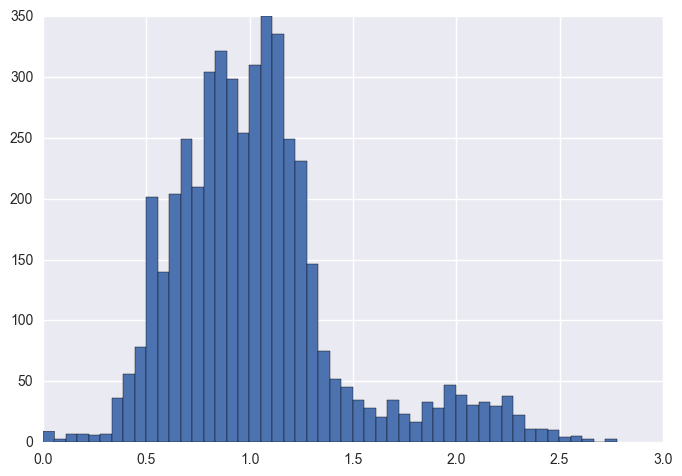

In [48]:
bus['years_bt_ins'].hist(bins=50)

What patterns do we see?

1. Two modes at 1.0 and 2.0. Why?

Inspections are required annually.  Why longer than 1 year?

---

# Understanding Scores

Our original goal was to understand scores.  Let's see what we can find.  Since restaurants can have multiple inspections let's look at the most recent.

In [49]:
def most_recent(df):
    return df.sort_values('date', ascending=False).iloc[0]

bus['latest_score'] = ins_grouped_by_bid.apply(most_recent)['score']
bus['mean_score'] = ins_grouped_by_bid['score'].mean()

Let's look at the spread of scores.

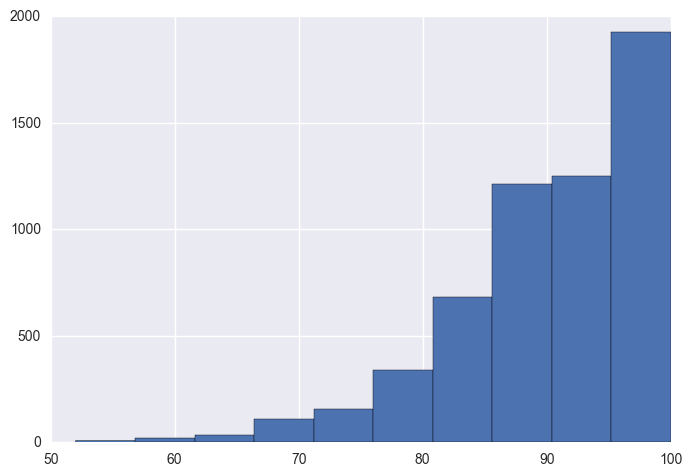

In [50]:
bus['latest_score'].hist(bins=10)

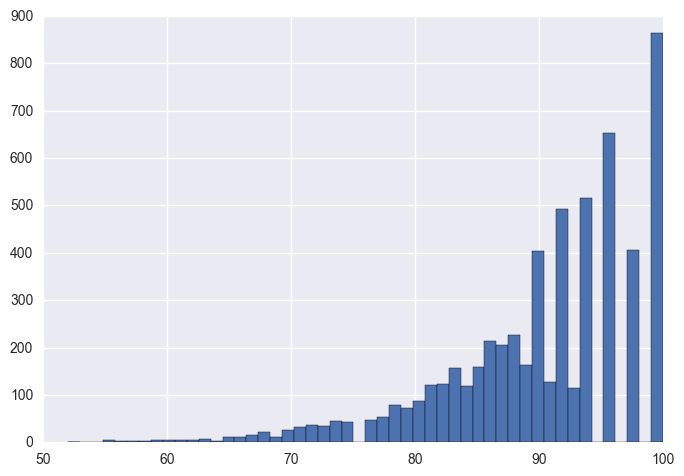

In [51]:
bus['latest_score'].hist(bins=50)

The scores seem to be pretty heavily skewed towards 100.  Is that good news?  There also appears to be a weird clustering around 90.  Why?

### Score inflation?

In [52]:
bus['latest_score'].describe()

count    5730.000000
mean       90.359860
std         8.061857
min        52.000000
25%        86.000000
50%        92.000000
75%        96.000000
max       100.000000
Name: latest_score, dtype: float64

What fraction of the restaurants are **poor** (below 70) by the cities standard?

---

In [53]:
threshold = 70

fraction = (bus['latest_score'] <= threshold).mean() # <- Why the mean?

print("Less than", str(round(fraction * 100, 2)) + 
      "% of the restaurants have a score of", threshold, "or less.")

Less than 2.17% of the restaurants have a score of 70 or less.


Would you feel comfortable eating at a restaurant that got a score of 90?

#  What is the Geographic Distribution of Scores?

What data could we use to answer this question?

In [54]:
print("Bus(" + ", ".join(bus.columns) + ")\n")
print("Ins(" + ", ".join(ins.columns) + ")\n")
print("Vio(" + ", ".join(vio.columns) + ")")

Bus(name, address, city, state, postal_code, latitude, longitude, phone_number, first_inspect, last_inspect, num_inspect, days_bt_ins, years_bt_ins, latest_score, mean_score)

Ins(score, date, type)

Vio(date, description)


---

* City?
* Postal Code
* Latitude & Longitude

# Postal Codes (ZIP codes)

### What is our coverage over postal codes?

What fraction of businesses don't have a postal code?

In [55]:
bus['postal_code'].isnull().mean()

0.041013460015835314

Is that acceptable?

---

Let's look at how the businesses are spread over the postal codes.

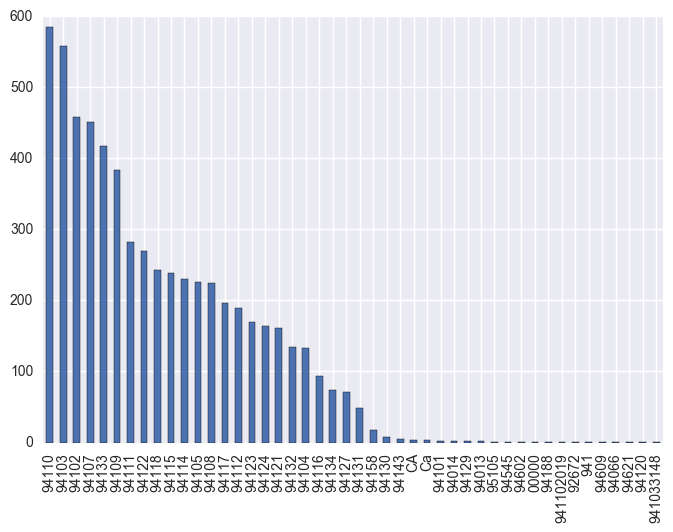

In [56]:
zipcounts = bus['postal_code'].value_counts()
zipcounts.name = 'counts'
zipcounts.plot('bar')

### What do we observe from above?

---

#### Observations?

1. 94110 seems to have the most inspections.
1. Messy Data! `CA` is not a zipcode.
1. Some postal codes are in extended form.

# Visualizing the counts of businesses in each postal code

Compute the number of occurrences for each postal code:

We will use the Folium mapping package.  To install it make sure you are in the correct conda environment (e.g., `ds100`) and then use `pip` (not conda which is still a few versions behind):

```bash
pip install folium
```

In [57]:
import folium
folium.__version__

'0.2.1'

We need version `0.2.0` or greater.

In [58]:
import folium
SF_COORDINATES = (37.76, -122.45)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=12)

#  choropleth : Greek for choro=area + pleth=multitued
sf_map.choropleth(geo_path = "condensed_zipcodes.json", 
                  data = zipcounts,
                  key_on = 'properties.zipcode',
                  threshold_scale = [100, 300, 400, 450, 500, 575],
                  fill_color='YlGn', fill_opacity=0.7, line_opacity=0.5)

sf_map

### Get ZIP Code Labels and Areas

This requires the python area package.  In your DS100 conda environment run:
```pip
pip install area
```

In [59]:
# Load my geo graphic data
import json
import numpy as np
import area

with open("condensed_zipcodes.json", "r") as f:
    geojson = json.load(f)

def extract_info(x):
    postal_code = x['properties']['zipcode']
    coords = x['geometry']['coordinates'][0]
    if len(coords) == 1:
        coords = coords[0]
    hectares = area.area(x['geometry']) / (10000.0)
    return (postal_code, hectares, np.mean(coords, axis=0))

# Construct a dataframe with the number of hectares in each zipcode
postal_codes = pd.DataFrame(
    [extract_info(g) for g in geojson['features']],
    columns=['zipcode', 'hectares', 'coords']).set_index('zipcode')

postal_codes.head()

,hectares,coords
zipcode,,
94108,69.880951,"[-122.4079474, 37.7914164]"
94104,20.714150,"[-122.402450875, 37.79189525]"
94122,612.142955,"[-122.477982706, 37.7598352941]"
94130,231.528932,"[-122.367345109, 37.8173646353]"
94158,270.461338,"[-122.38815998, 37.7694004322]"


In [60]:
for zipcode, row in postal_codes.iterrows():
    text = '<div style="font-size: 24pt">%s</div>' % zipcode
    sf_map.add_child(folium.Marker(row['coords'][::-1], icon=folium.DivIcon(html=text)))
sf_map

How does this relate to the regions in SF?  

---

<img src="http://my.paragon-re.com/Docs/General/SixtyFortyImages/San_Francisco_Neighborhood_Map.jpg" alt="Drawing" style="width: 500px;"/>

Would we expect small zipcodes regions to have as many restaurants as big regions?

---

## Normalizing by ZIP code by area

In [61]:
tmp = pd.DataFrame(zipcounts).join(postal_codes)
density = tmp['counts'] / tmp['hectares']

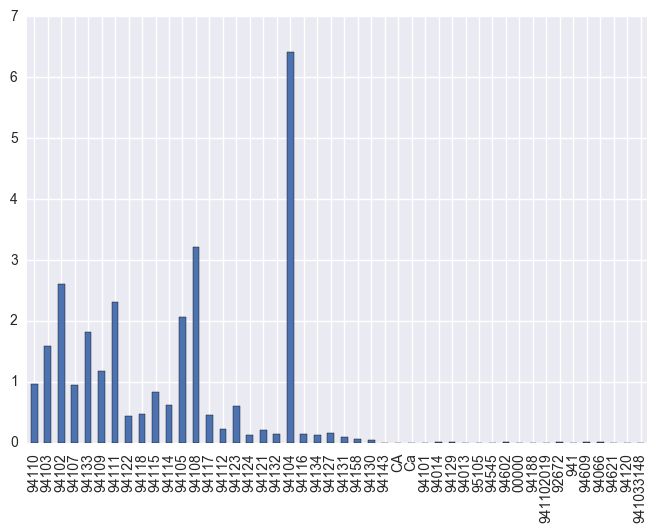

In [62]:
density.plot(kind='bar')

In [63]:
import folium
SF_COORDINATES = (37.77, -122.45)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=12)

#choropleth : Greek for choro=area + pleth=multitued
sf_map.choropleth(geo_path = "condensed_zipcodes.json", 
                  data = density,
                  key_on = 'properties.zipcode',
                  fill_color='YlGn', fill_opacity=0.7, line_opacity=0.5)

for zipcode, row in postal_codes.iterrows():
    text = '<div style="font-size: 12pt">%s</div>' % zipcode
    sf_map.add_child(folium.Marker(row['coords'][::-1], icon=folium.DivIcon(html=text)))

sf_map

/Users/jegonzal/anaconda3/envs/ds100/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


How does this relate to the regions in SF?  

---

<img src="http://my.paragon-re.com/Docs/General/SixtyFortyImages/San_Francisco_Neighborhood_Map.jpg" alt="Drawing" style="width: 500px;"/>

## More Fine Grained Picture

We also have geo-coordinates attached to some of the restaurants.  How many are missing?

How many of the entries are missing the latitude or longitude fields?  

In [64]:
(bus['latitude'].isnull() | bus['longitude'].isnull()).mean()

0.43008709422011082

We having missing values for 43% of the businesses.  Is that a problem?

---

Nearly half are missing the latitude or longitude information!  Let's look at the locations of those that do have a location.

In [65]:
bus_locations = bus[['name', 'latitude', 'longitude', 'latest_score', 'mean_score']].dropna()

print("There are", len(bus_locations), "businesses with locations.")

There are 3550 businesses with locations.


The following generates a HeatMap of locations where we have collected restaurant data with geo-location information.

In [66]:
import folium
import folium.plugins # The Folium Javascript Map Library

locs = bus_locations[['latitude', 'longitude']].as_matrix()

SF_COORDINATES = (37.76, -122.45)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=12)
sf_map.add_children(folium.plugins.HeatMap(locs, radius = 10))
sf_map

# Scores broken down by ZIP code

### Focus on foodie ZIP codes

Lets define a foodie ZIP codes as one that has at least 200 restaurants.

In [67]:
# foodie_zips = zipcounts[zipcounts > 200].index
foodie_zips = density[density > 0.5].index

In [68]:
foodie_bus = bus[bus['postal_code'].isin(foodie_zips)]

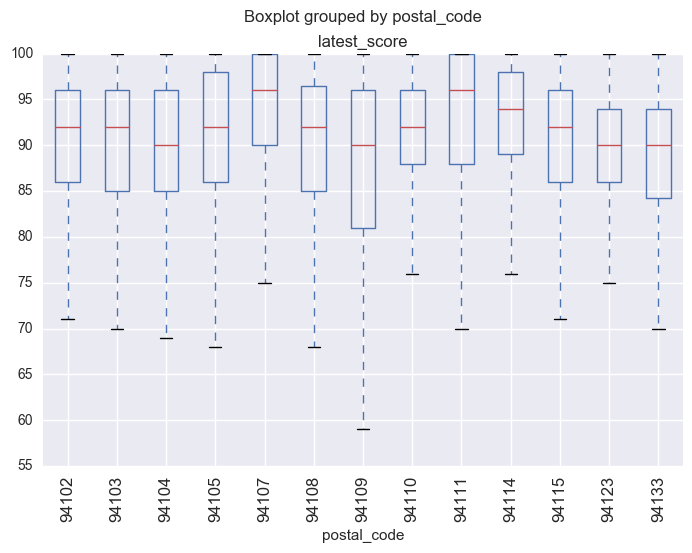

In [69]:
foodie_bus.boxplot(by='postal_code', column='latest_score')
_ = plt.xticks(rotation='vertical')

#### What are the safest places to eat?
#### What is the least safe place to eat?

<img src="http://www.king-realtygroup.com/assets/uploads/sf-zip-map.jpg" alt="Drawing" style="width: 500px;"/>

<img src="http://my.paragon-re.com/Docs/General/SixtyFortyImages/San_Francisco_Neighborhood_Map.jpg" alt="Drawing" style="width: 800px;"/>

## Another kind of visualization (Skip)

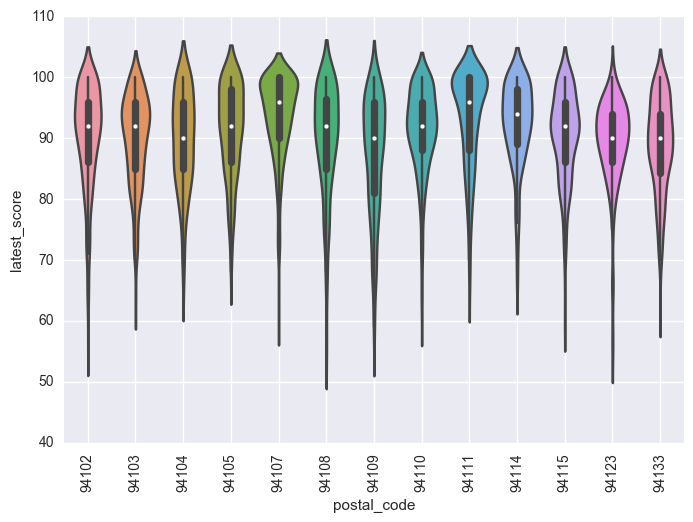

In [70]:
sns.violinplot(x="postal_code", y="latest_score", 
               data=foodie_bus)
_ = plt.grid(b=True, which='major', color='w', linewidth=1.0)
_ = plt.xticks(rotation='vertical')

Why do the scores go above 100?

---

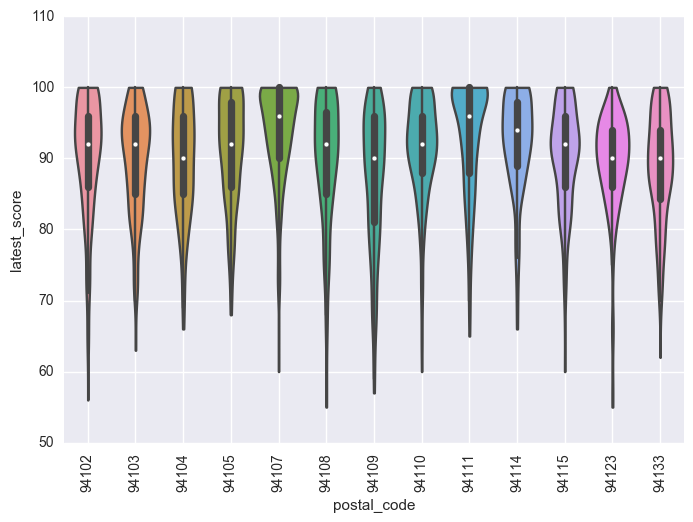

In [71]:
sns.violinplot(x="postal_code", y="latest_score", 
               data=foodie_bus,
               cut= 0)
_ = plt.grid(b=True, which='major', color='w', linewidth=1.0)
_ = plt.xticks(rotation='vertical')

In [72]:
score_quantiles = bus[bus['postal_code'].isin(foodie_zips)][['postal_code', 'latest_score']].dropna()\
    .groupby('postal_code')['latest_score'].quantile([0.1, 0.25, .5, 0.75, 0.9])

# Visualizing the Scores by Zipcode

First we need to get the boundaries of the zip codes for our foody_zips

In [73]:
foodie_geojson = geojson.copy()
foodie_geojson['features'] = [f for f in geojson['features'] if f['properties']['zipcode'] in foodie_zips]

## Median scores by zipcode

In [74]:
import folium
SF_COORDINATES = (37.76, -122.45)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=12)
sf_map.choropleth(geo_str = json.dumps(foodie_geojson), 
                  data = score_quantiles[:, 0.50],
                  key_on = 'properties.zipcode',
                  fill_color='BuPu', fill_opacity=0.7, line_opacity=0.5)
sf_map

/Users/jegonzal/anaconda3/envs/ds100/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


## Lower 10% Quantile

In [75]:
import folium
SF_COORDINATES = (37.76, -122.45)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=12)
sf_map.choropleth(geo_str = json.dumps(foodie_geojson), 
                  data = score_quantiles[:, 0.1],
                  key_on = 'properties.zipcode',
                  fill_color='BuPu', fill_opacity=0.7, line_opacity=0.5)
sf_map

/Users/jegonzal/anaconda3/envs/ds100/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


## ZIP Code with most spread (Interquartile Range)

In [76]:
import folium
SF_COORDINATES = (37.76, -122.45)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=12)
sf_map.choropleth(geo_str = json.dumps(foodie_geojson), 
                  data = score_quantiles[:, 0.75] - score_quantiles[:, 0.25],
                  key_on = 'properties.zipcode',
                  fill_color='BuPu', fill_opacity=0.7, line_opacity=0.5)
sf_map

/Users/jegonzal/anaconda3/envs/ds100/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


## Low Scoring Locations

In [77]:
SF_COORDINATES = (37.76, -122.45)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=12)

cluster = folium.MarkerCluster()

for _, row in bus_locations[bus_locations['latest_score'] < 70.0].iterrows():
    cluster.add_child(folium.Marker(location=[row['latitude'], row['longitude']], 
                                    popup=(row['name'] +": " + str(row['latest_score']))))
sf_map.add_child(cluster)
sf_map

sf_map

# What kinds of violations are correlated with low scores?

In [78]:
vio.head()

,date,description
business_id,,
10,2016-05-03,High risk food holding temperature [ date vi...
10,2016-05-03,High risk food holding temperature [ date vi...
10,2016-05-03,High risk vermin infestation
10,2016-05-03,Unapproved or unmaintained equipment or utensils
10,2016-05-03,No thermometers or uncalibrated thermometers


In [79]:
vio['description'].value_counts()

Unclean or degraded floors walls or ceilings                                                                          986
Moderate risk food holding temperature                                                                                661
Unapproved or unmaintained equipment or utensils                                                                      649
Inadequate and inaccessible handwashing facilities                                                                    557
Wiping cloths not clean or properly stored or inadequate sanitizer                                                    527
Improper food storage                                                                                                 492
Inadequately cleaned or sanitized food contact surfaces                                                               491
Food safety certificate or food handler card not available                                                            407
Foods not protected from

## Dirty data!  

It looks like the description field has data information!  How many descriptions are there?

In [80]:
len(vio['description'].value_counts())

15072

We can use regular expressions to extract dates and remove the:

 > [ date violation corrected: ##/#/#### ]

string

In [81]:
vio['resolved'] = pd.to_datetime(vio['description'].str.extract("(\d+\/\d+\/\d+)", expand=False))
vio['desc'] = vio['description'].str.replace("\[.*\]","").str.strip()

Now let's look at all the value counts

In [82]:
print(vio['desc'].value_counts().to_string())

Unclean or degraded floors walls or ceilings                                 3559
Moderate risk food holding temperature                                       2809
Inadequate and inaccessible handwashing facilities                           2613
Unapproved or unmaintained equipment or utensils                             2450
Inadequately cleaned or sanitized food contact surfaces                      2325
Wiping cloths not clean or properly stored or inadequate sanitizer           2304
Improper food storage                                                        2163
Foods not protected from contamination                                       1907
Unclean nonfood contact surfaces                                             1861
High risk food holding temperature                                           1642
Moderate risk vermin infestation                                             1532
Food safety certificate or food handler card not available                   1254
Improper storage

Restaurants with many violations might be a bad sign:

In [83]:
bus['num_violations'] = vio.index.value_counts()

What are the worst offenders? 

In [84]:
bus.sort_values('num_violations', ascending=False)[['name', 'num_violations', 'postal_code']].head(10)

,name,num_violations,postal_code
business_id,,,
75139,HAKKA RESTAURANT,42.0,94121
489,DOL-HO RESTAURANT,39.0,94133
60354,TAQUERIA CASTILLO B,38.0,94102
3115,YEE'S RESTAURANT,37.0,94133
70996,HONG KONG LOUNGE,36.0,94121
1833,ROGUE ALES PUBLIC HOUSE,36.0,94133
71385,YAMA SUSHI RESTAURANT,34.0,94132
76547,QUAN PHO INC,34.0,94112
37882,FIRST CAKE,34.0,94121


#### Is that fair?  

---

#### what about age?

That might not be fair if the restaurant is old.  Let's look at at the violations on the latest inspection.

In [85]:
vio_bus = vio.join(bus['last_inspect'])
recent_vio = vio_bus[vio_bus['date'] >= vio_bus['last_inspect']]
bus['num_recent_violations'] = recent_vio.index.value_counts()

In [86]:
bus.sort_values('num_recent_violations', ascending=False)[['name', 'num_violations', 'num_recent_violations']].head(10)

,name,num_violations,num_recent_violations
business_id,,,
78328,GOLDEN WOK,32.0,20.0
82134,HARBOR VILLA RESTAURANT,16.0,16.0
521,CALIFORNIA CRISP,24.0,15.0
87492,NAN KING ROAD BISTRO,13.0,13.0
68672,KAMA SUSHI SOMA,27.0,13.0
66961,MI TIERRA MARKET,19.0,13.0
1641,MARTHA & BROS. COFFEE CO,19.0,12.0
35026,MANGOSTEEN,17.0,12.0
77548,POC-CHUC RESTAURANT,20.0,12.0


What about unresolved recent violations?

In [87]:
bus['num_unresolved_violations'] = recent_vio[recent_vio['resolved'].isnull()].index.value_counts()

In [88]:
bus.sort_values('num_unresolved_violations', ascending=False)[[
        'name', 'num_violations', 'num_recent_violations','num_unresolved_violations']].head(10)

,name,num_violations,num_recent_violations,num_unresolved_violations
business_id,,,,
3491,BORODUDUR RESTAURANT,16.0,11.0,11.0
6654,HIEP-THANH MARKET,27.0,11.0,11.0
3875,MARINA SUPER,19.0,11.0,11.0
2764,AL-HAMRA,21.0,10.0,10.0
35447,SPARKY'S PIZZA & DINER,15.0,10.0,10.0
19003,PANCHITAS RESTAURANT,18.0,10.0,10.0
2331,JADE CAFE,27.0,10.0,10.0
71012,LITTLE PARIS,18.0,10.0,10.0
17411,OYE MANAGUA,23.0,9.0,9.0


# Lets Look at these violations on a map

## 75th Quantile Number of Recent Violations

In [89]:
score_quantiles2 = bus[['postal_code', 'num_recent_violations']].dropna()\
    .groupby('postal_code')['num_recent_violations'].quantile([0.25, .5, 0.75])

SF_COORDINATES = (37.76, -122.45)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=12)
sf_map.choropleth(geo_str = json.dumps(foodie_geojson), 
                  data = score_quantiles2[:, 0.75],
                  key_on = 'properties.zipcode',
                  fill_color='BuPu', fill_opacity=0.7, line_opacity=0.5)
sf_map

/Users/jegonzal/anaconda3/envs/ds100/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


In [90]:
SF_COORDINATES = (37.76, -122.45)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=12)
bus_loc = bus[~bus['latitude'].isnull()]
for bid, row in bus_loc[bus_loc['num_recent_violations'] > 7].iterrows():
    msg = "[" + str(bid) + "] " + row['name'] +": " + str(row['latest_score']) + "--> " + \
    " -- ".join(recent_vio.loc[bid]['desc'].values)
    sf_map.add_child(folium.Marker(location=[row['latitude'], row['longitude']], 
                                    popup=msg))
sf_map

# What are the Violations of high-scoring restaurants?

Recall:

In [91]:
bus['latest_score'].dropna().describe()

count    5730.000000
mean       90.359860
std         8.061857
min        52.000000
25%        86.000000
50%        92.000000
75%        96.000000
max       100.000000
Name: latest_score, dtype: float64

Let's look at restaurants that scored above 96

In [92]:
tmp = recent_vio.join(bus['latest_score'])
tmp[tmp['latest_score'] >= 96.].groupby('desc')['desc'].count().sort_values(ascending=False)

desc
Unclean or degraded floors walls or ceilings                                 186
Wiping cloths not clean or properly stored or inadequate sanitizer           116
Unapproved or unmaintained equipment or utensils                             106
Moderate risk food holding temperature                                        96
Improper food storage                                                         86
Inadequate and inaccessible handwashing facilities                            78
Inadequately cleaned or sanitized food contact surfaces                       67
Food safety certificate or food handler card not available                    59
Unclean nonfood contact surfaces                                              57
Permit license or inspection report not posted                                55
Improper storage of equipment utensils or linens                              52
Low risk vermin infestation                                                   51
Improper or defective p

## Violations of Low Scoring Restaurants

In [93]:
tmp = recent_vio.join(bus['latest_score'])
tmp[tmp['latest_score'] <= 70.].groupby('desc')['desc'].count().sort_values(ascending=False)

desc
High risk food holding temperature                                           82
Foods not protected from contamination                                       77
Unclean or degraded floors walls or ceilings                                 71
Inadequate and inaccessible handwashing facilities                           61
Unapproved or unmaintained equipment or utensils                             59
High risk vermin infestation                                                 59
Unclean or unsanitary food contact surfaces                                  54
Inadequate food safety knowledge or lack of certified food safety manager    53
Inadequately cleaned or sanitized food contact surfaces                      52
Unclean hands or improper use of gloves                                      51
Improper thawing methods                                                     50
Moderate risk food holding temperature                                       41
Improper cooling methods           

# If you have the same violations do you have the same score?

In [94]:
grouped_by_vio = training_data.groupby(list(features.columns))
res = pd.DataFrame({
    'count': grouped_by_vio['latest_score'].count().values,
    'mean': grouped_by_vio['latest_score'].mean().values,
    'var': grouped_by_vio['latest_score'].var().values
})
res[res['count'] > 25]

NameError: name 'training_data' is not defined

# Building a Predictive Model

We could try to build a regressive model to identify how violations might contribute to the final score.

In [ ]:
features = pd.get_dummies(recent_vio['desc']).groupby(recent_vio.index).sum()
# training_data = bus[['latest_score', 'num_recent_violations']]\
#     .join(features)
training_data = bus[['latest_score']].join(features)
training_data = training_data.dropna()

In [ ]:
X = training_data.drop('latest_score', axis=1).as_matrix()
Y = training_data['latest_score'].as_matrix()

How much data do we have?

In [ ]:
print(X.shape)

In [ ]:
import sklearn
import sklearn.model_selection
(Xtr, Xte, Ytr, Yte) = sklearn.model_selection.train_test_split(X,Y, test_size=.1)

In [ ]:
import sklearn.linear_model
# model = sklearn.linear_model.LassoCV(eps=0.000001, n_alphas=1000, max_iter=50000, fit_intercept=True)
model = sklearn.linear_model.LinearRegression()
model.fit(Xtr, Ytr)
print("The R^2 value:", model.score(Xte, Yte))

## Listing the coefficient of the model

The most negative coefficient determine the the violations that most contributed to a reduction in score.

In [ ]:
feature_weights = pd.DataFrame({
        'features': training_data.drop('latest_score', axis=1).columns, 
        'weights': model.coef_})
print(feature_weights.sort_values('weights'))

# Done! (Not Really)

There are a lot of questions we left unanswered. The data for other cities is available and we didn't even begin to answer the questions about how food safety is changing. 